### TASK 9A

Mount drive to our code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Install required pip

In [ ]:
!pip install PyWavelets
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.5 MB/s eta 0:00:00


Wavelet Denoising of EEG Signals with PSNR Evaluation

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pywt
from sklearn.metrics import mean_squared_error

# Paths to directories
base_path = "drive/MyDrive/EEG_Data/"
noisy_path = os.path.join(base_path, "noisy_train_data")
ground_truth_path = os.path.join(base_path, "train_data")
denoised_path = os.path.join(base_path, "denoised_data")
ans=0
n=0
# Ensure denoised data directory exists
os.makedirs(denoised_path, exist_ok=True)

# Classes
classes = ["Complex_Partial_Seizures", "Electrographic_Seizures", "Normal", "Video_detected_Seizures_with_no_visual_change_over_EEG"]

# Function for wavelet denoising
def wavelet_denoise(signal, wavelet='db4', level=None):
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    sigma = np.median(np.abs(coeffs[-1])) / 0.6745
    threshold = sigma * np.sqrt(2 * np.log(len(signal)))
    denoised_coeffs = [pywt.threshold(c, value=threshold, mode='soft') if i > 0 else c
                       for i, c in enumerate(coeffs)]
    return pywt.waverec(denoised_coeffs, wavelet)

# Function to compute PSNR
def compute_psnr(denoised, ground_truth):
    mse = mean_squared_error(denoised, ground_truth)
    max_signal = np.max(ground_truth)
    return 20 * np.log10(max_signal / np.sqrt(mse))

# Process all data points for each class
for class_name in classes:
    print(f"Processing class: {class_name}")

    noisy_class_path = os.path.join(noisy_path, class_name)
    ground_truth_class_path = os.path.join(ground_truth_path, class_name)
    denoised_class_path = os.path.join(denoised_path, class_name)

    # Create directory for denoised class if it doesn't exist
    os.makedirs(denoised_class_path, exist_ok=True)

    if not os.path.exists(noisy_class_path) or not os.path.exists(ground_truth_class_path):
        print(f"Directory not found for class: {class_name}")
        continue

    noisy_files = [f for f in os.listdir(noisy_class_path) if f.endswith(".npy")]

    for file_name in noisy_files:
        noisy_file_path = os.path.join(noisy_class_path, file_name)
        ground_truth_file_path = os.path.join(ground_truth_class_path, file_name)

        if not os.path.exists(ground_truth_file_path):
            print(f"Ground truth file does not exist: {ground_truth_file_path}")
            continue

        try:
            noisy_signal = np.load(noisy_file_path)
            ground_truth_signal = np.load(ground_truth_file_path)

            # Start with default wavelet decomposition level
            level = None
            psnr = 0

            # Incrementally increase wavelet decomposition level until PSNR > 20 or level > 4
            while psnr <= 20 and (level is None or level <= 4):
                denoised_signal = wavelet_denoise(noisy_signal, level=level)
                psnr = compute_psnr(denoised_signal, ground_truth_signal)
                if level is None:
                    level = 1  # Start at level 1 if not set
                else:
                    level += 1  # Increment level
                ans+=psnr;
                n+=1;
                denoised_file_path = os.path.join(denoised_class_path, file_name)
                np.save(denoised_file_path, denoised_signal)

        except Exception as e:
            print(f"Error processing file {file_name}: {e}")



Processing class: Complex_Partial_Seizures
Processing class: Electrographic_Seizures
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2174 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2169 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2056 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2104 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2020 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2059 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2131 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electrographic_Seizures/2111 (1).npy
Ground truth file does not exist: drive/MyDrive/EEG_Data/train_data/Electr

Average PSNR values

In [ ]:
print("Denoising complete.")
print("Average PSNR is " ,(ans/n))

Denoising complete.
Average PSNR is  30.67611108434227


Graphs of noisy denoisy and train data and comparing them

Plotting signals for class: Complex_Partial_Seizures


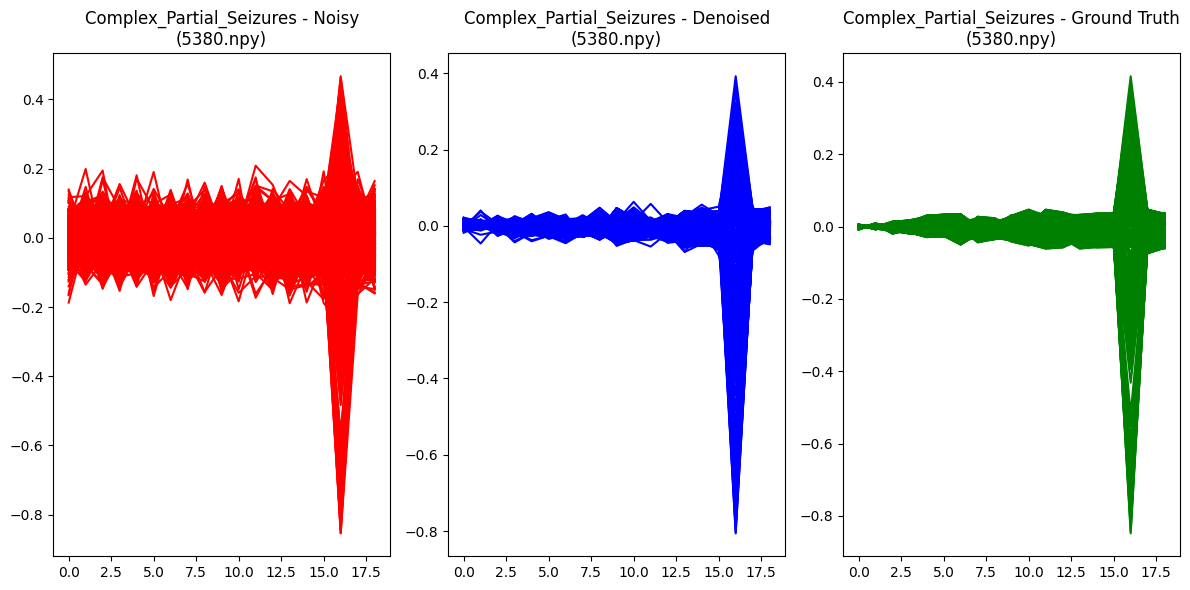

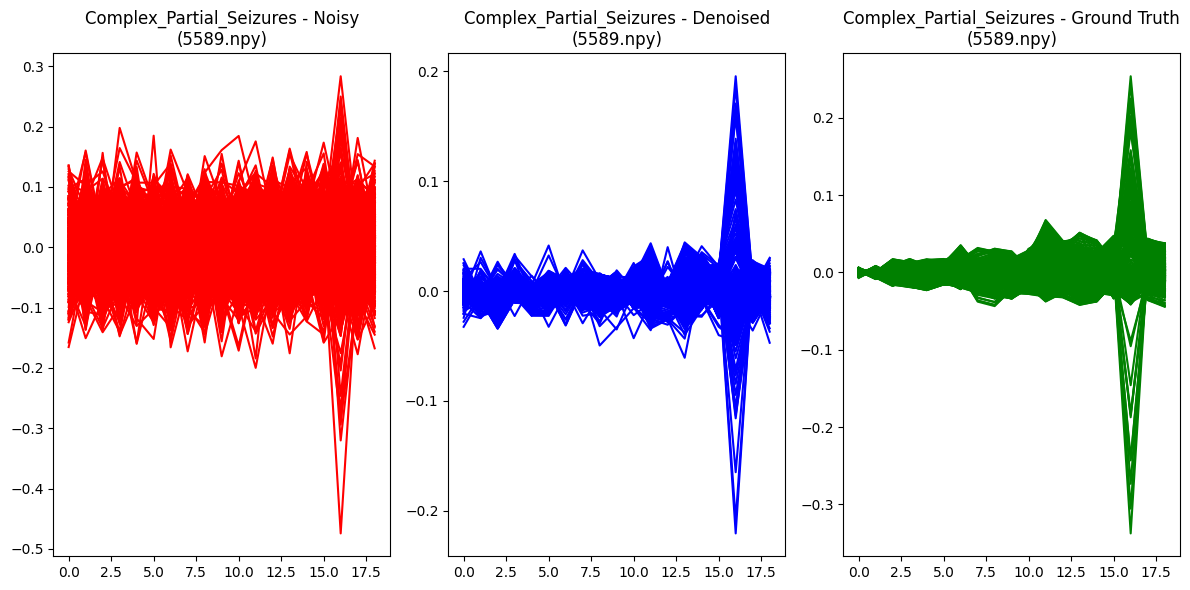

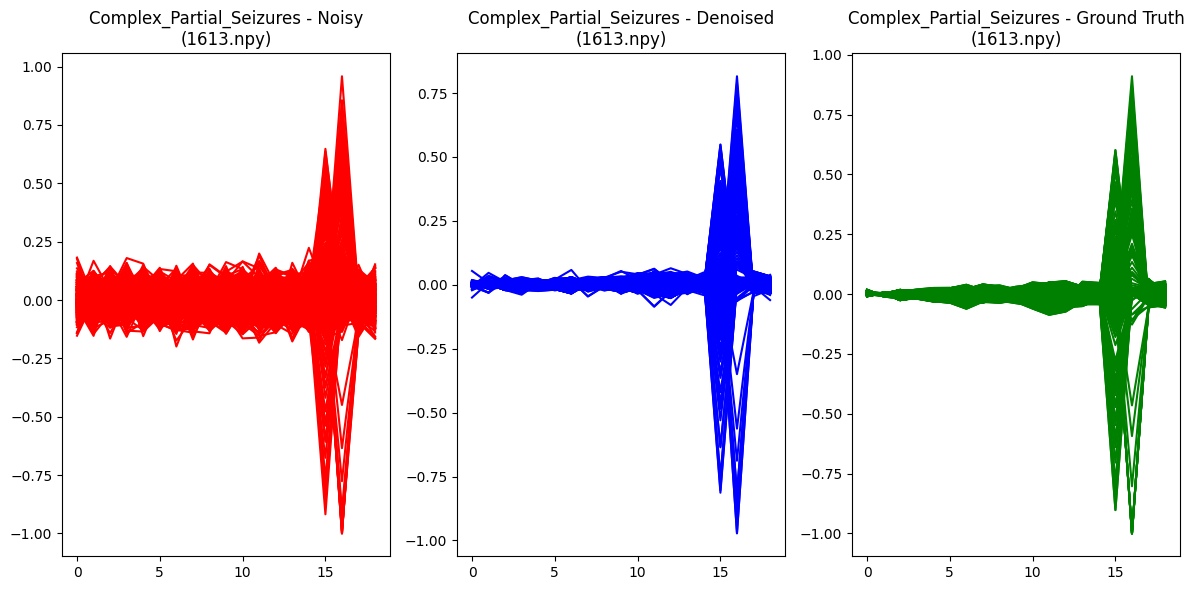

Plotting signals for class: Electrographic_Seizures


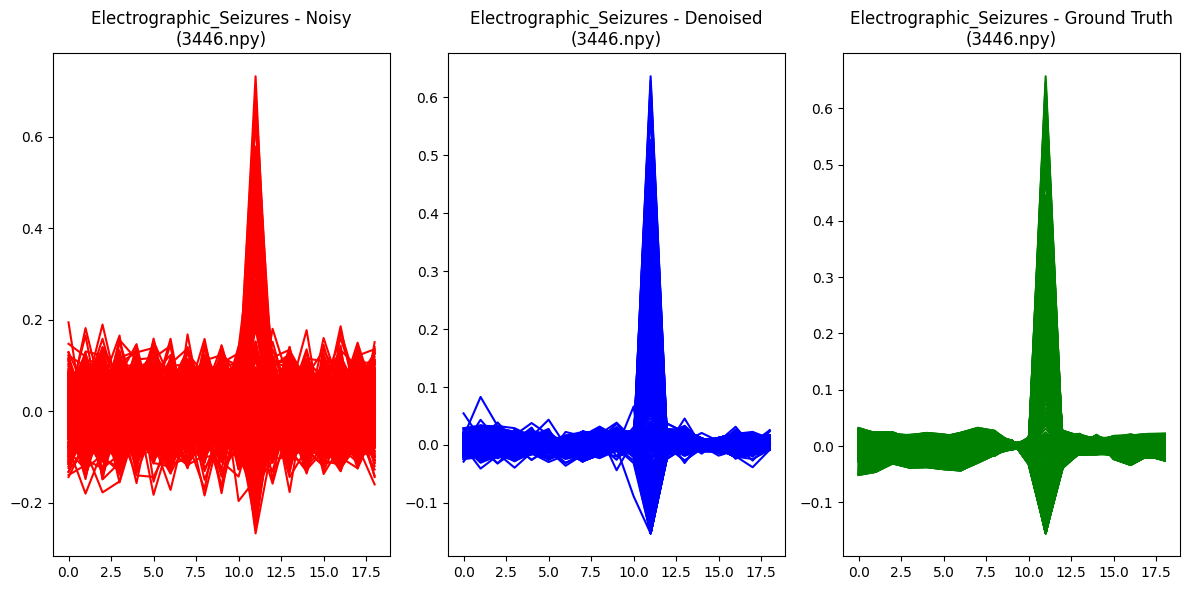

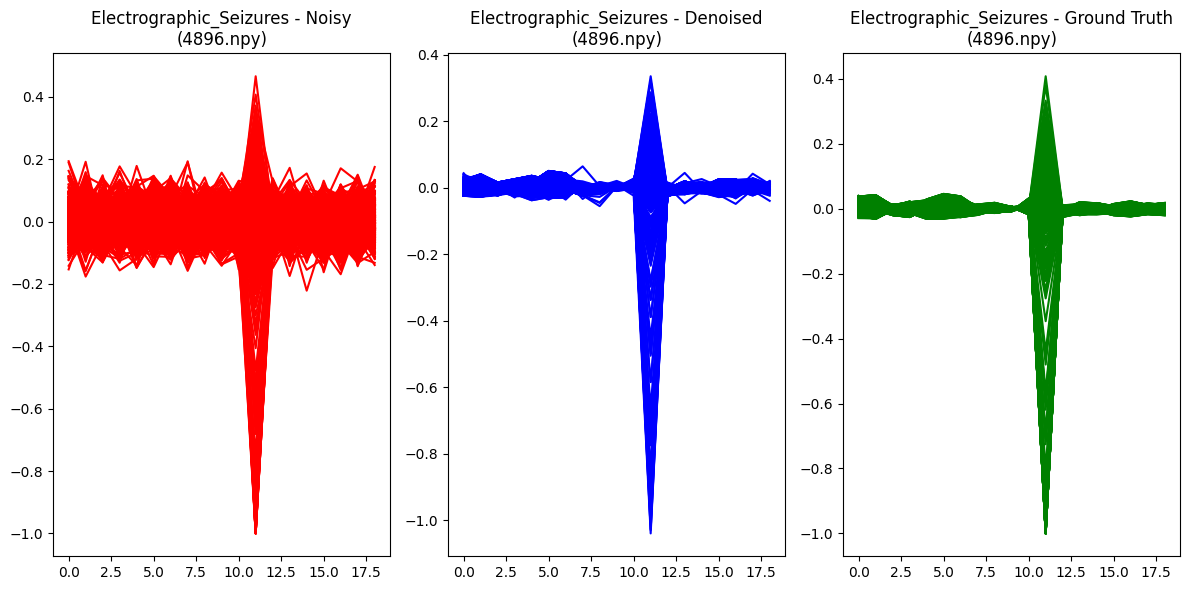

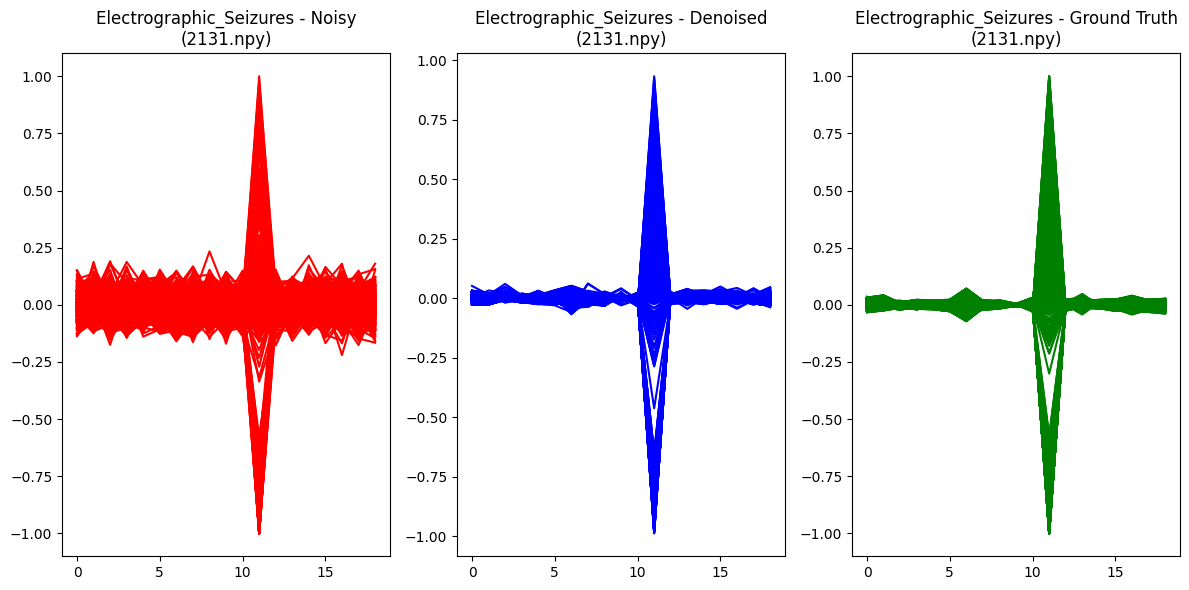

Plotting signals for class: Normal


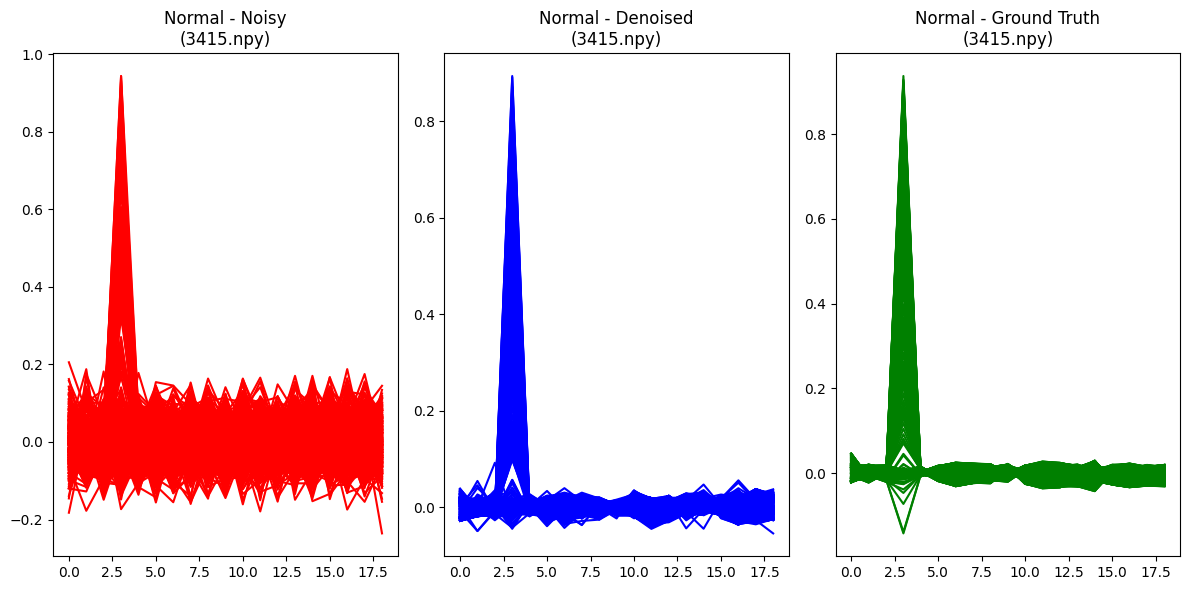

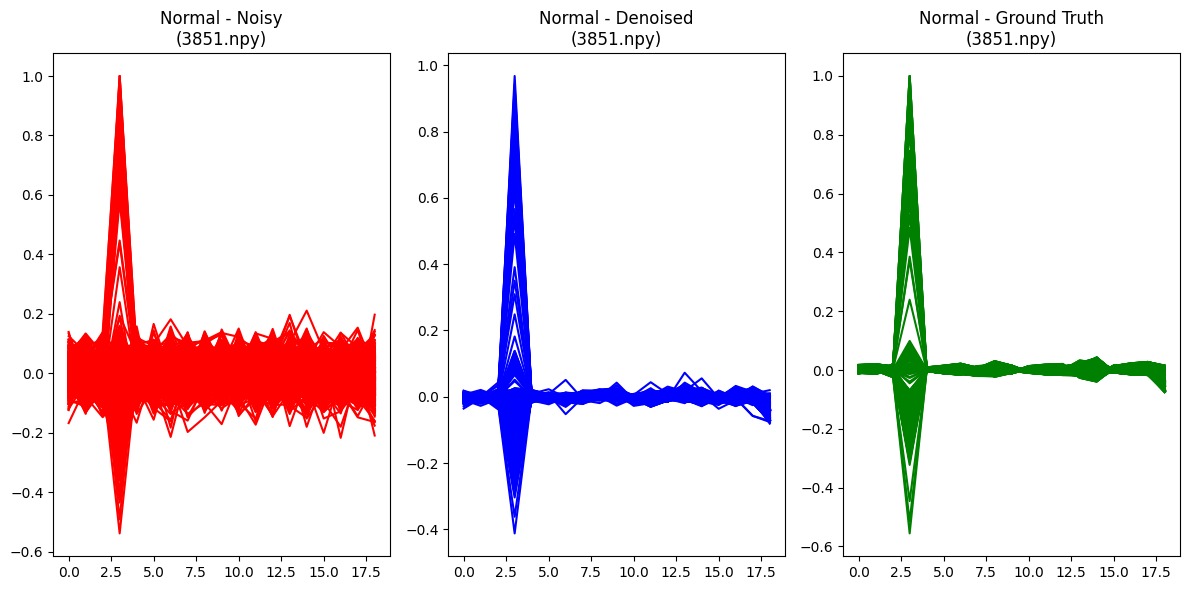

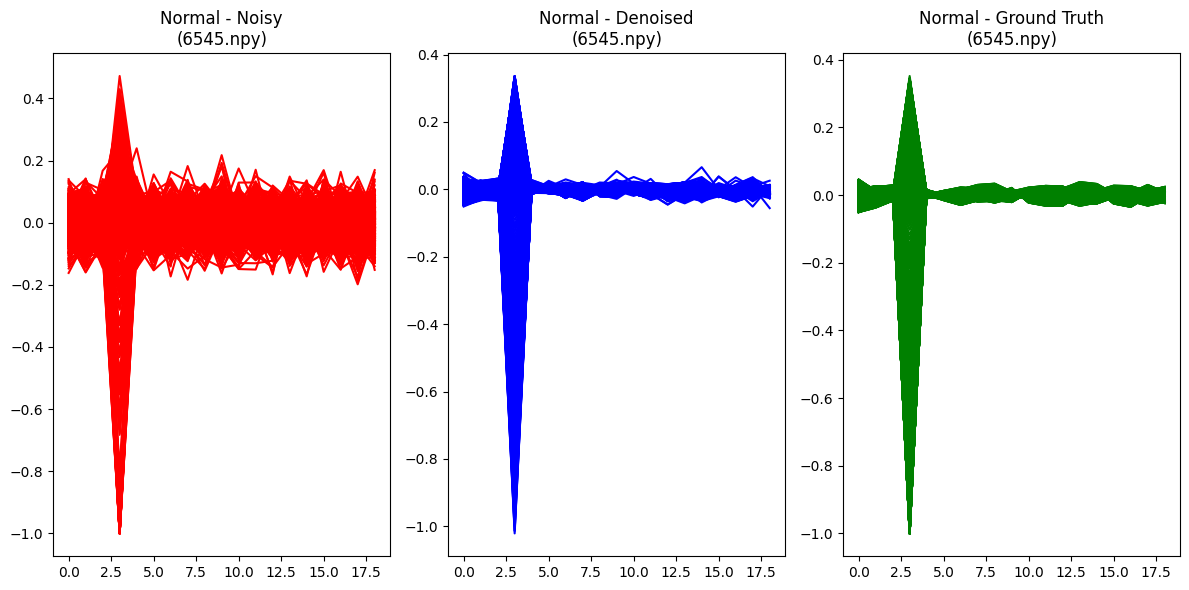

Plotting signals for class: Video_detected_Seizures_with_no_visual_change_over_EEG


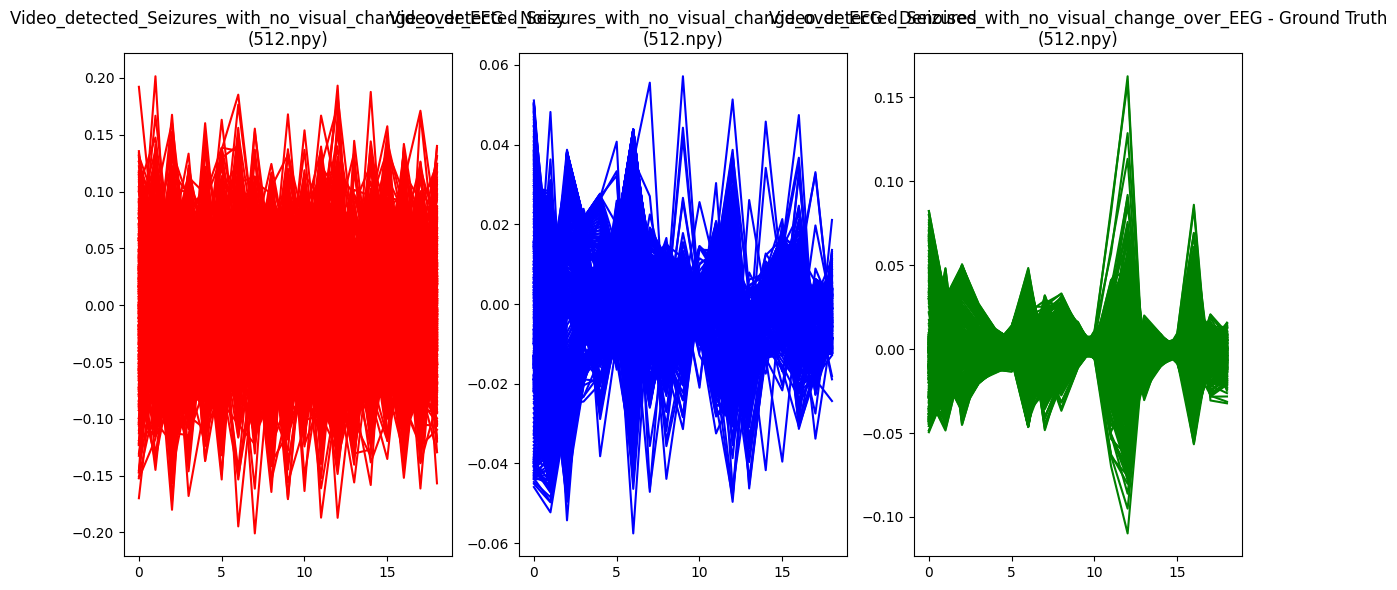

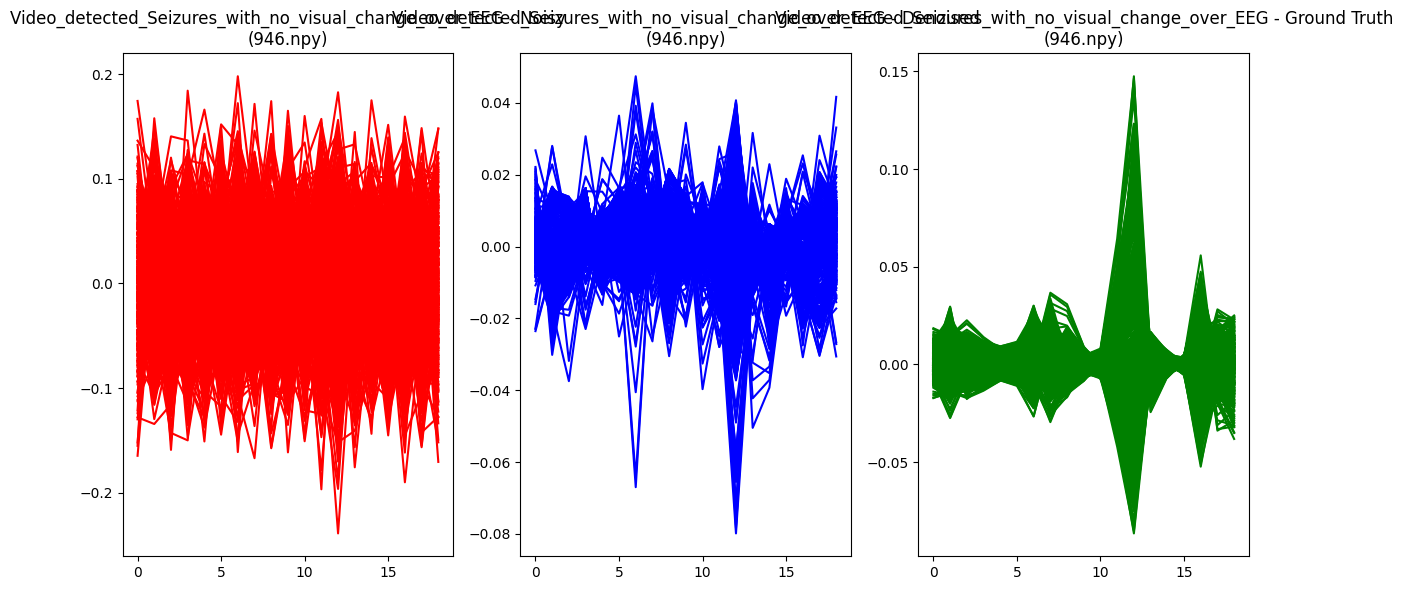

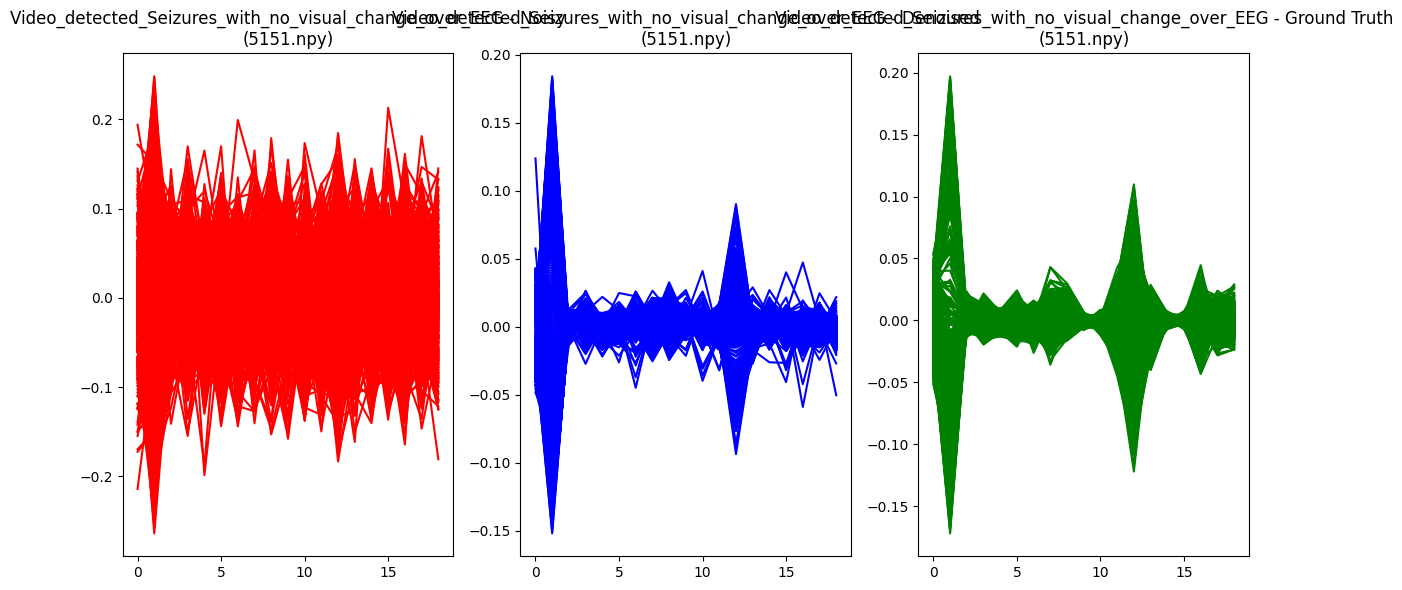

In [ ]:
import random

# Function to plot signals
def plot_signals(noisy, denoised, ground_truth, class_name, file_name):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.plot(noisy, color='red')
    plt.title(f"{class_name} - Noisy\n({file_name})")
    plt.subplot(1, 3, 2)
    plt.plot(denoised, color='blue')
    plt.title(f"{class_name} - Denoised\n({file_name})")
    plt.subplot(1, 3, 3)
    plt.plot(ground_truth, color='green')
    plt.title(f"{class_name} - Ground Truth\n({file_name})")
    plt.tight_layout()
    plt.show()

# Plot signals for each class
for class_name in classes:
    print(f"Plotting signals for class: {class_name}")

    noisy_class_path = os.path.join(noisy_path, class_name)
    ground_truth_class_path = os.path.join(ground_truth_path, class_name)
    denoised_class_path = os.path.join(denoised_path, class_name)

    if not os.path.exists(noisy_class_path) or not os.path.exists(ground_truth_class_path) or not os.path.exists(denoised_class_path):
        print(f"Directory not found for class: {class_name}")
        continue

    noisy_files = [f for f in os.listdir(noisy_class_path) if f.endswith(".npy")]
    denoised_files = [f for f in os.listdir(denoised_class_path) if f.endswith(".npy")]
    ground_truth_files = [f for f in os.listdir(ground_truth_class_path) if f.endswith(".npy")]

    # Find common files across all three directories
    common_files = list(set(noisy_files) & set(denoised_files) & set(ground_truth_files))

    # Select up to 3 files for plotting
    if len(common_files) > 3:
        common_files = random.sample(common_files, 3)

    for file_name in common_files:
        try:
            noisy_signal = np.load(os.path.join(noisy_class_path, file_name))
            denoised_signal = np.load(os.path.join(denoised_class_path, file_name))
            ground_truth_signal = np.load(os.path.join(ground_truth_class_path, file_name))

            # Plot the signals
            plot_signals(noisy_signal, denoised_signal, ground_truth_signal, class_name, file_name)
        except Exception as e:
            print(f"Error plotting file {file_name}: {e}")
